<a href="https://colab.research.google.com/github/shivam-mangal/project/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
##Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
##Data collection
## importing the datasets
data = pd.read_csv("/content/Wine_Quality_Data.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
##Number of rows and columns
data.shape

(6497, 13)

In [9]:
## Checking the missing value in the datasets
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

There is no null values in our dataset

#Data Analysis and Visulaization

In [10]:
## Statistical measure of the dataset
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


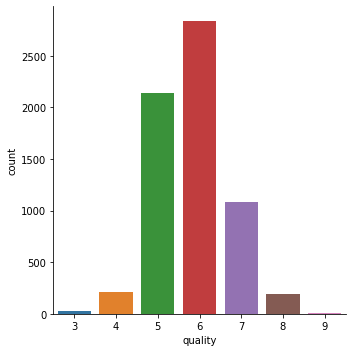

In [11]:
## Number of values of each quality 
sns.catplot(x="quality", data=data, kind="count")

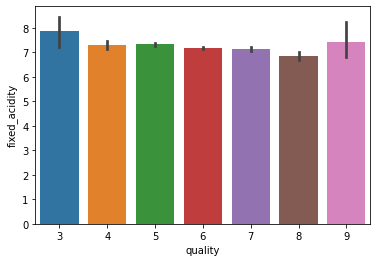

In [12]:
## fixed_acidity vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="fixed_acidity", data=data)

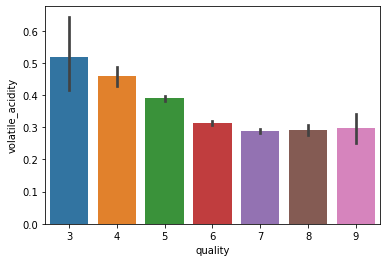

In [13]:
## volatile_acidity vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile_acidity", data=data)

volatile acidity is inversely proportional to quality. As the volatile acidity increase quality will decrease of the wine

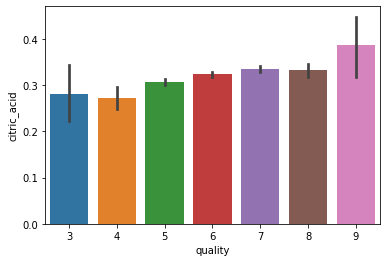

In [14]:
## citric_acid vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="citric_acid", data=data)

Here we can see that the citric_acid is directly proporational to quality of the wine. More the citric_acid quality of wine is good

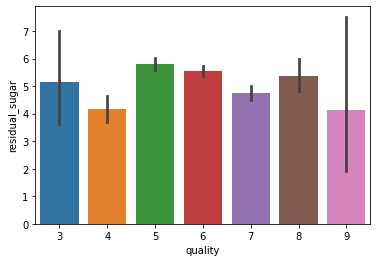

In [15]:
## residual_sugar vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="residual_sugar", data=data)

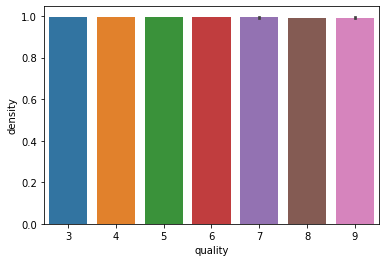

In [16]:
## density vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="density", data=data)

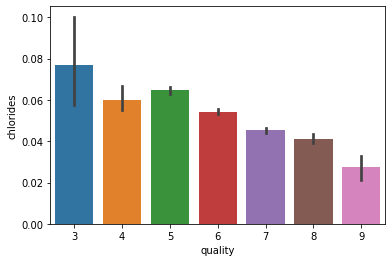

In [17]:
## chlorides	 vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="chlorides", data=data)

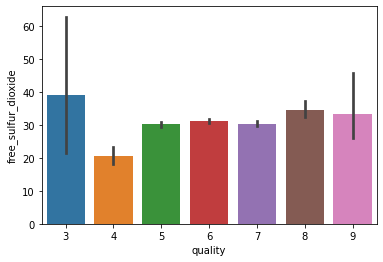

In [18]:
## free_sulfur_dioxide	 vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="free_sulfur_dioxide", data=data)

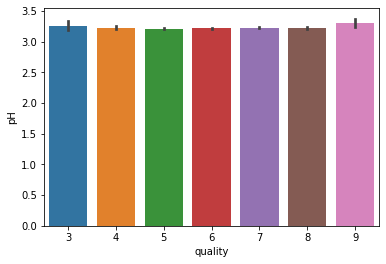

In [19]:
## ph	 vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="pH", data=data)

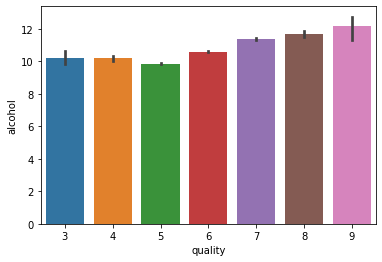

In [20]:
## alcohal	 vs Quality
polt = plt.Figure(figsize=(5,5))
sns.barplot(x="quality", y="alcohol", data=data)

##Correlation

In [21]:
correlation = data.corr()

In [22]:
print(correlation["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


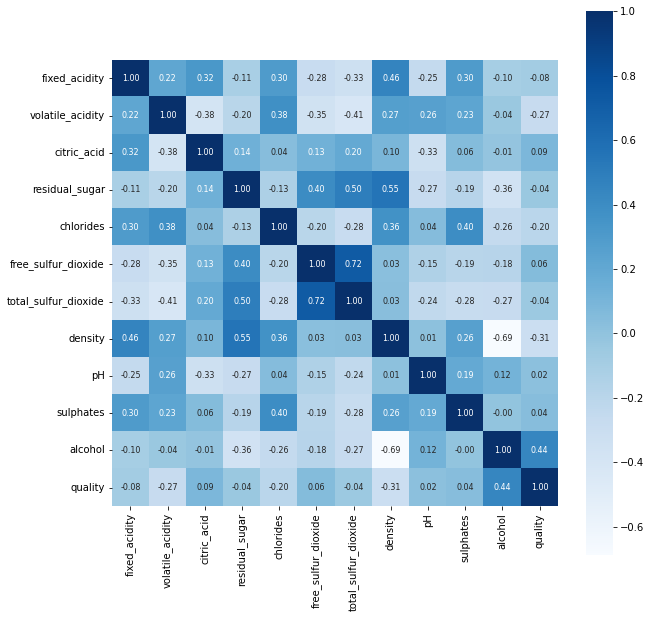

In [23]:
## Constructing the heatmap to understand the relationship between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot =True, cbar=True, square= True, fmt = ".2f", annot_kws={"size":8}, cmap="Blues")

Dark shades represents positive correlation while lighter shades represents negative correlation.

Observations:

Here we can infer that “density” has strong positive correlation with “fixed acidity” whereas it has strong negative correlation with “alcohol”.

“fixed_acidity” and "residual sugar" has almost no correlation with “quality”.

Since correlation is zero we can infer there is no linear relationship between these two predictors.

Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.

## Data preprocessing

In [24]:
df = data.drop(["fixed_acidity","residual_sugar","density"],axis=1)

In [25]:
## separate the data and label
X = df.drop(["quality","color"],axis=1)

In [26]:
print(X)

      volatile_acidity  citric_acid  chlorides  free_sulfur_dioxide  \
0                 0.70         0.00      0.076                 11.0   
1                 0.88         0.00      0.098                 25.0   
2                 0.76         0.04      0.092                 15.0   
3                 0.28         0.56      0.075                 17.0   
4                 0.70         0.00      0.076                 11.0   
...                ...          ...        ...                  ...   
6492              0.21         0.29      0.039                 24.0   
6493              0.32         0.36      0.047                 57.0   
6494              0.24         0.19      0.041                 30.0   
6495              0.29         0.30      0.022                 20.0   
6496              0.21         0.38      0.020                 22.0   

      total_sulfur_dioxide    pH  sulphates  alcohol  
0                     34.0  3.51       0.56      9.4  
1                     67.0  3.20     

Label Binarization




In [52]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [53]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64


In [54]:
Y.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

## Train and Test dataset

In [41]:
## Spliting the training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 8)
(1300, 8)
(5197,)
(1300,)


## Train the model using Random Forest classifier Algorithm

In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
## Prediction of the model 
y_pred = model.predict(X_test)

In [45]:
##Accuracy score of the model
y_pred_accuracy = accuracy_score(y_pred, y_test)

In [46]:
print("Accuracy score :", y_pred_accuracy)

Accuracy score : 0.8384615384615385


In [47]:
print("Classification Report :\n", classification_report(y_pred, y_test))

Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       412
           1       0.92      0.84      0.88       888

    accuracy                           0.84      1300
   macro avg       0.81      0.84      0.82      1300
weighted avg       0.85      0.84      0.84      1300



In [48]:
predicted_df = {'predicted_values': y_pred, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)


,predicted_values,original_values
2197,1,1
2255,1,1
6304,1,1
1016,1,1
2881,0,0
5882,1,1
421,1,1
5029,1,1
4200,1,0
2242,0,0


In [38]:
input_data = (0.41,0.24,0.034,10,53,0.032,0.5,13.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
